# Mean Shift image segmentation

In [1]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
from itertools import cycle
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline


In [2]:
# Importing the image
!wget 'https://raw.githubusercontent.com/profsarang/ThinkingDataScience/main/data/fruits.jpg'

--2022-09-08 06:03:16--  https://raw.githubusercontent.com/profsarang/ThinkingDataScience/main/data/fruits.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87522 (85K) [image/jpeg]
Saving to: ‘fruits.jpg’

fruits.jpg          100%[===================>]  85.47K  --.-KB/s    in 0.02s   

2022-09-08 06:03:17 (5.00 MB/s) - ‘fruits.jpg’ saved [87522/87522]



In [3]:
image = Image.open('/content/fruits.jpg')

In [4]:
img = np.array(image)

In [5]:
# saving the image shape
shape = img.shape

In [6]:
# reshaping image 
reshape_img = img.reshape((-1, 3))

Text(0.5, 1.0, '(427, 640, 3)')

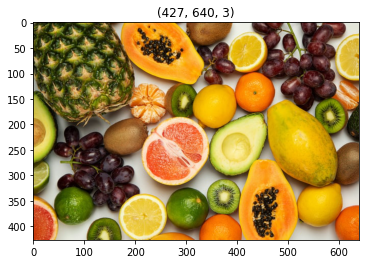

In [7]:
#plotting the image
plt.imshow(image)
plt.title(img.shape)

In [8]:
bandwidth = estimate_bandwidth(reshape_img, quantile=0.1, n_samples=100)
bandwidth

47.46503755744857

In [9]:
msc = MeanShift(bandwidth=bandwidth, bin_seeding=True)
msc.fit(reshape_img)

MeanShift(bandwidth=47.46503755744857, bin_seeding=True)

In [10]:
print("shape of labels : %d" % msc.labels_.shape)
print( msc.cluster_centers_.shape)
print("number of estimated clusters : %d" % len(np.unique(msc.labels_)))

shape of labels : 273280
(4, 3)
number of estimated clusters : 4


In [11]:
labels = msc.labels_
result_image = np.reshape(labels, shape[:2])

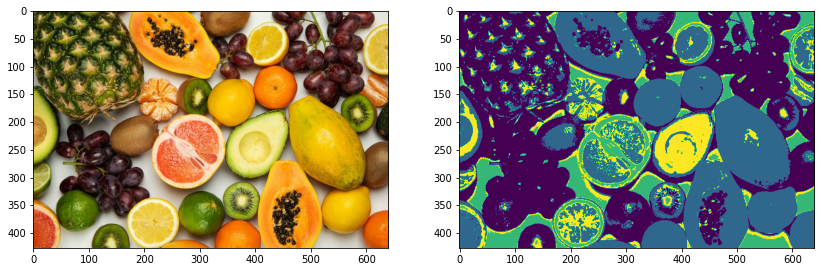

In [12]:
fig = plt.figure(2, figsize=(14, 12))
ax = fig.add_subplot(121)
ax = plt.imshow(img) 
ax = fig.add_subplot(122)
ax = plt.imshow(result_image)  
plt.show()